In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os 
os.environ['KAGGLE_USERNAME']='akdcpa'
os.environ['KAGGLE_KEY']="a115a96e7ab95f64a81abbe9d1871c34"

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [4]:
main_dir = '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])
train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0311.jpeg', '1634.jpg', '0763.jpg', '0469.jpg', '0943.jpg', '0488.jpg', '1576.jpg', '0773.jpg', '1577.jpg', '0006.jpg']
['64.jpg', '172.jpg', '133.jpg', '124.jpg', '310.jpg', '192.jpg', '1.jpg', '234.jpg', '283.jpg', '316.jpg']


['/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0311.jpeg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/1634.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0763.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0469.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0943.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0488.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/1576.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Mask/0773.jpg']
['/home/aanand/Documents/Projects/FinalYear Project/MainProject/New Masks Dataset/Train/Non Mask/64.jpg', '/home/aanand/Documents/Projects/FinalYear Project/MainProject/New M

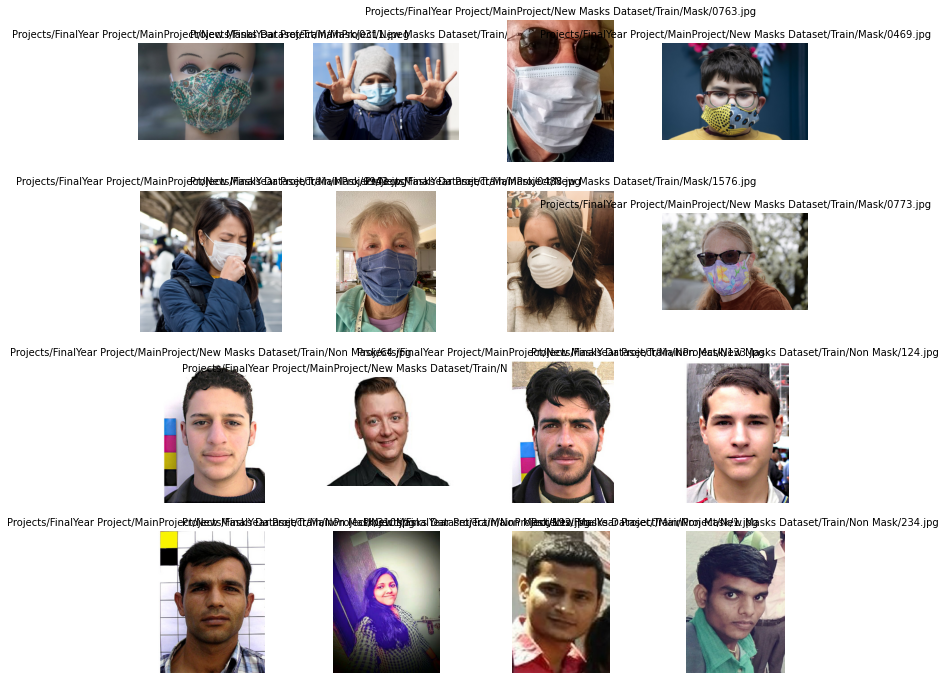

In [5]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()
  


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [6]:
valid_generator.image_shape

(150, 150, 3)

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [8]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 108s 5s/step - loss: 3.9959 - accuracy: 0.5214 - val_loss: 0.6930 - val_accuracy: 0.5131
Epoch 2/30
19/19 [==============================] - 91s 5s/step - loss: 0.6584 - accuracy: 0.5776 - val_loss: 0.6179 - val_accuracy: 0.7974
Epoch 3/30
19/19 [==============================] - 85s 5s/step - loss: 0.5052 - accuracy: 0.7722 - val_loss: 0.4874 - val_accuracy: 0.8497
Epoch 4/30
19/19 [==============================] - 72s 4s/step - loss: 0.3891 - accuracy: 0.8549 - val_loss: 0.5080 - val_accuracy: 0.8529
Epoch 5/30
19/19 [==============================] - 79s 4s/step - loss: 0.3397 - accuracy: 0.8908 - val_loss: 0.3402 - val_accuracy: 0.8987
Epoch 6/30
19/19 [==============================] - 69s 4s/step - loss: 0.2563 - accuracy: 0.9035 - val_loss: 0.3315 - val_accuracy: 0.9118
Epoch 7/30
19/19 [==============================] - 69s 4s/step - loss: 0.2247 - accuracy: 0.9165 - val_loss: 0.2785 - val_accuracy: 0.9118
Epoch 8/30
19/19 [=

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

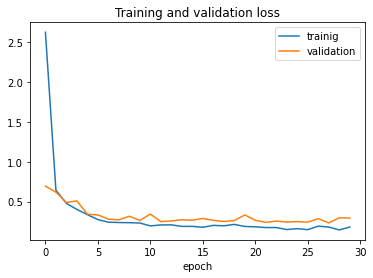

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

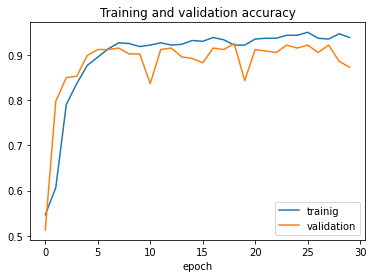

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [13]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 5s 954ms/step - loss: 0.2089 - accuracy: 0.9300
test acc :0.9300000071525574 test loss:0.20885992050170898


In [19]:
import numpy as np
# from google.colab import files
from keras.preprocessing import image

# uploaded = files.upload()
# for fname in uploaded.keys():
#   img_path='/home/aanand/Documents/Projects/FinalYear Project/MainProject'+fname
#   img = image.load_img(img_path , target_size=(150,150))
#   images = image.img_to_array(img)
#   images=np.expand_dims(images,axis=0)
#   prediction = model.predict(images)
#   print(fname)
#   if prediction==0:
#     print('mask')
#   else:
#     print('nomask')
img_path='/home/aanand/Documents/dummy/maskes.jpeg'
img = image.load_img(img_path , target_size=(150,150))
images = image.img_to_array(img)
images=np.expand_dims(images,axis=0)
prediction = model.predict(images)
# print(fname)
if prediction==0:
    print('mask')
else:
    print('nomask')

mask


In [23]:
model.save('model.h5')